In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

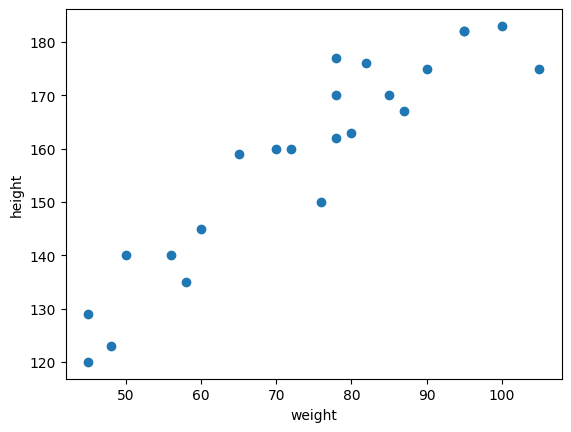

In [2]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


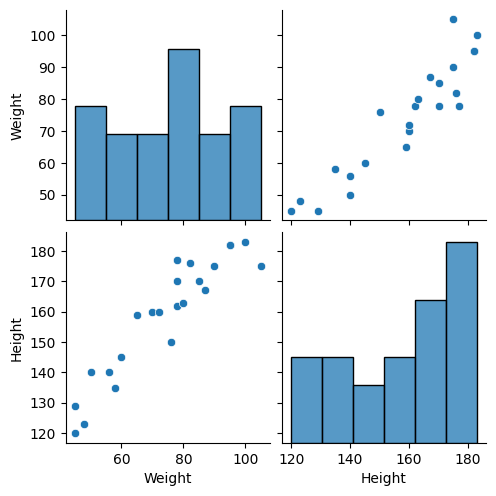

In [3]:
print(df.corr())

import seaborn as sns
sns.pairplot(df)

In [4]:
#step 1: independent and dependent features
X=df[['Weight']] #always take 2D df or np.arr for independent features
y=df['Height']  #can take 1D df or np.arr for dependent features

In [5]:
#step 2: train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [6]:
#step 3: standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [7]:
# applying linear regression
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)





,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
print("coef:",regression.coef_)
print("intercept:",regression.intercept_)

coef: [17.2982057]
intercept: 156.47058823529412


Text(0, 0.5, 'height')

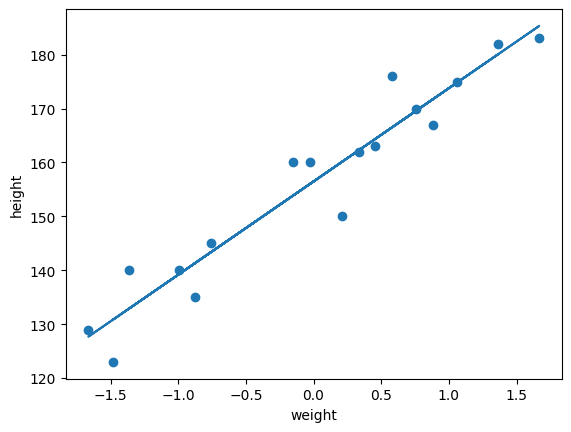

In [9]:
#plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.xlabel('weight')
plt.ylabel('height')

In [10]:
#predict for test data
y_pred=regression.predict(X_test)
print(y_test.values)
print(X_test)
X_text=scaler.inverse_transform(X_test)
print(X_text)
print("output by model:",y_pred)


[177 170 120 182 159 175]
[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]
[[ 78.]
 [ 78.]
 [ 45.]
 [ 95.]
 [ 65.]
 [105.]]
output by model: [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [11]:
#prefromance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score:",r2_score(y_test,y_pred))

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R2 score: 0.7360826717981276


In [13]:
#prediction

# prediction=regression.predict(scaler.transform([[i]]))
x=input("Enter weight to predict height or type 'stop' to end:")
while x!="stop":
    if x!="stop":
        i=float(x)
        prediction=regression.predict(scaler.transform([[i]]))
    print(f"Prediction for height -> {i}:", prediction)
    x=input("Enter weight to predict height or type 'stop' to end:")